# Import Libraries

In [1]:
import os,shutil
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Create Directories for Small Data Set

In [2]:
#original_dataset_dir = '/Users/shruthiravi/Documents/Shruthi 9th grade/SkinLesionsSF18/cats_dogs/data_set/train'
base_dir = '/Users/shruthiravi/Documents/11th_grade/poc_sc'

In [3]:
os.mkdir(base_dir)

FileExistsError: [Errno 17] File exists: '/Users/shruthiravi/Documents/11th_grade/poc_sc'

In [24]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

In [25]:
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

In [26]:
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [28]:
train_stasis_dir = os.path.join(train_dir, 'stasis')
os.mkdir(train_stasis_dir)

In [29]:
train_cell_dir = os.path.join(train_dir, 'cell')
os.mkdir(train_cell_dir)

In [30]:
validation_stasis_dir = os.path.join(validation_dir, 'stasis')
os.mkdir(validation_stasis_dir)

In [31]:
validation_cell_dir = os.path.join(validation_dir, 'cell')
os.mkdir(validation_cell_dir)

In [32]:
test_stasis_dir = os.path.join(test_dir, 'stasis')
os.mkdir(test_stasis_dir)

In [33]:
test_cell_dir = os.path.join(test_dir, 'cell')
os.mkdir(test_cell_dir)

# Verify Image Counts

In [47]:
print('total training stasis images:', len(os.listdir(train_stasis_dir)))

total training stasis images: 146


In [48]:
print('total training cell images:', len(os.listdir(train_exa_dir)))

total training cell images: 250


In [53]:
print('total validation stasis images:', len(os.listdir(validation_stasis_dir)))

total validation stasis images: 17


In [54]:
print('total validation cell images:', len(os.listdir(validation_cell_dir)))

total validation cell images: 41


In [57]:
print('total test stasis images:', len(os.listdir(test_stasis_dir)))

total test stasis images: 46


In [58]:
print('total test cell images:', len(os.listdir(test_cell_dir)))

total test cell images: 53


# Data Preprocessing: Create Image Batch Generators

In [59]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [60]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [61]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 394 images belonging to 2 classes.


In [62]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 56 images belonging to 2 classes.


In [63]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [64]:
data_batch.shape

(20, 150, 150, 3)

In [65]:
labels_batch[1]

1.0

# Define the Model

In [66]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu',
                       input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [67]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

### Configuring model for training

In [68]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

# Fitting model using Batch Generator

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/20
100/100 [==============================] - 174s 2s/step - loss: 0.6282 - acc: 0.6453 - val_loss: 0.5552 - val_acc: 0.7318
Epoch 2/20
100/100 [==============================] - 160s 2s/step - loss: 0.5541 - acc: 0.7114 - val_loss: 0.5454 - val_acc: 0.6752
Epoch 3/20
100/100 [==============================] - 165s 2s/step - loss: 0.4992 - acc: 0.7604 - val_loss: 0.5535 - val_acc: 0.6774
Epoch 4/20
100/100 [==============================] - 167s 2s/step - loss: 0.4380 - acc: 0.8024 - val_loss: 0.6008 - val_acc: 0.6442
Epoch 5/20
100/100 [==============================] - 155s 2s/step - loss: 0.3797 - acc: 0.8476 - val_loss: 0.5738 - val_acc: 0.7489
Epoch 6/20
100/100 [==============================] - 138s 1s/step - loss: 0.3000 - acc: 0.8846 - val_loss: 0.6235 - val_acc: 0.6966
Epoch 7/20
100/100 [==============================] - 1595s 16s/step - loss: 0.2488 - acc: 0.9102 - val_loss: 0.6477 - val_acc: 0.7137
Epoch 8/20
100/100 [==============================] - 147s 1s/step 

In [ ]:
model.save('stasis_cell_1.h5')

In [56]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend()
    plt.xlim([-70000, 70000])
    plt.ylim([0, 1])


def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-")  # b- means blue not dashed
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.xlim([0, 1])
    plt.ylim([0, 1])


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')  # dashed diagonal
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.xlim([0, 1])
    plt.ylim([0, 1])

In [57]:
plot_roc_curve()

TypeError: plot_roc_curve() missing 2 required positional arguments: 'fpr' and 'tpr'

# Making a graph

In [32]:
import matplotlib.pyplot as plt

In [43]:
history.history

{'acc': [0.59581152002536819,
  0.73821989801853738,
  0.82984293193717273,
  0.85194805225768644,
  0.88759894012461238,
  0.9052355993168516,
  0.93193716856197539,
  0.9428571380578078,
  0.95445025466499533,
  0.96623376127961391,
  0.98153033923347899,
  0.98219895050787798,
  0.98638743318188249,
  0.98909090896705532,
  0.99267015719288931,
  0.99005235583370266,
  0.99633507828437851,
  0.99476439806179229,
  0.9942857136974087,
  0.99630606897902674],
 'loss': [0.65777834813008129,
  0.54699216221327562,
  0.42521151705250065,
  0.35032023928769224,
  0.29073174445248529,
  0.22943141892630392,
  0.17997835497542514,
  0.1469591499850541,
  0.1136235669876951,
  0.094936818327125791,
  0.060401536105438698,
  0.055505002920725507,
  0.042954180100890055,
  0.032712897025774436,
  0.025281624478000843,
  0.0281950870322,
  0.012506312035496228,
  0.019086492912729656,
  0.019336349907822389,
  0.015552094210586245],
 'val_acc': [0.71509009217088282,
  0.70608108047697993,
  0.7

In [ ]:
def plot_roc_curve

# Data Augmentation

In [70]:
datagen = ImageDataGenerator(
    rotation_range=60,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [71]:
from keras.preprocessing import image

In [72]:
fnames = [os.path.join(train_stasis_dir, fname) for
         fname in os.listdir(train_stasis_dir)]

In [73]:
img_path = fnames[3]

In [74]:
img = image.load_img(img_path, target_size=(150,150))

In [75]:
x = image.img_to_array(img)

In [76]:
x = x.reshape((1,) + x.shape)

In [77]:
i = 0
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0 :
        break

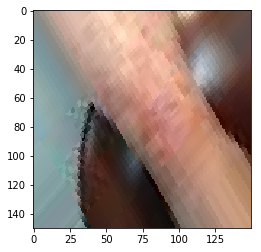

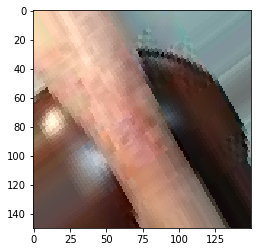

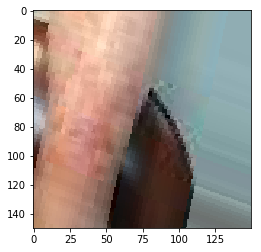

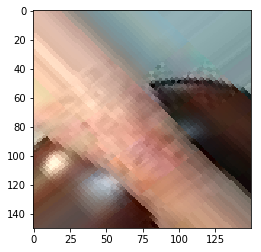

In [78]:
plt.show()

# Adding Dropout

In [79]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu',
                       input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [80]:
train_datagen = ImageDataGenerator (
    rescale=1./255,
    rotation_range=40,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=-.2,
    horizontal_flip=True,)

In [81]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [82]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 394 images belonging to 2 classes.


In [83]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 56 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/20
100/100 [==============================] - 152s 2s/step - loss: 0.4449 - acc: 0.7814 - val_loss: 0.5470 - val_acc: 0.7147
Epoch 2/20
100/100 [==============================] - 140s 1s/step - loss: 0.4480 - acc: 0.7894 - val_loss: 0.6064 - val_acc: 0.6795
Epoch 3/20
100/100 [==============================] - 146s 1s/step - loss: 0.4384 - acc: 0.7908 - val_loss: 0.6173 - val_acc: 0.6806
Epoch 4/20
100/100 [==============================] - 145s 1s/step - loss: 0.4397 - acc: 0.7929 - val_loss: 0.5979 - val_acc: 0.7318
Epoch 5/20
100/100 [==============================] - 146s 1s/step - loss: 0.4380 - acc: 0.7812 - val_loss: 0.7450 - val_acc: 0.6966
Epoch 6/20
100/100 [==============================] - 148s 1s/step - loss: 0.4211 - acc: 0.7998 - val_loss: 0.5759 - val_acc: 0.6806
Epoch 7/20
100/100 [==============================] - 149s 1s/step - loss: 0.4250 - acc: 0.8080 - val_loss: 0.5797 - val_acc: 0.7329
Epoch 8/20
100/100 [==============================] - 146s 1s/step - 

In [2]:
model.save('cats_and_dogs_2.h5')

NameError: name 'model' is not defined

# Importing VGG16 Model

In [44]:
from keras.applications import VGG16

In [45]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150,150,3))

In [46]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________